# Bitcoin data analysis (log return)
## Yepeng Ding
### 12/13/2019

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.tsa.api as smt
from arch import arch_model

### Import data

In [2]:
data = pd.read_csv('./data/BTC_USD_2013-10-01_2019-12-15-CoinDesk.csv')
data_date = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data_cp = data['Closing Price (USD)']
data_size = len(data_cp)
print(data_cp.describe())

count     2257.000000
mean      3207.038487
std       3781.376050
min        108.584830
25%        421.424000
50%        805.796250
75%       6280.310107
max      19166.978740
Name: Closing Price (USD), dtype: float64


### Plot daily index

/Users/michaeltei/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


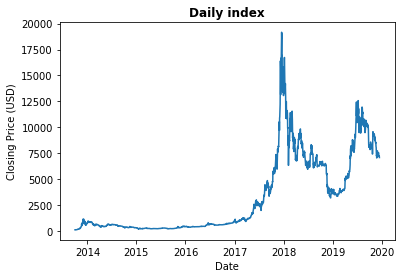

In [3]:
plt.title("Daily index", weight='bold')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.plot(data_date, data_cp)
plt.show()

### Calculate log return

In [4]:
returns = pd.Series(np.diff(np.log(data_cp)))
print(returns.describe())
print('Skewness', stats.skew(returns))
print('Kurtosis', stats.kurtosis(returns))
print('Jarque–Bera test', stats.jarque_bera(returns))

count    2256.000000
mean        0.001795
std         0.043736
min        -0.284480
25%        -0.013123
50%         0.001463
75%         0.019200
max         0.306376
dtype: float64
Skewness -0.3192958063018781
Kurtosis 6.399724928806654
Jarque–Bera test (3888.2421707352564, 0.0)


### Plot log return

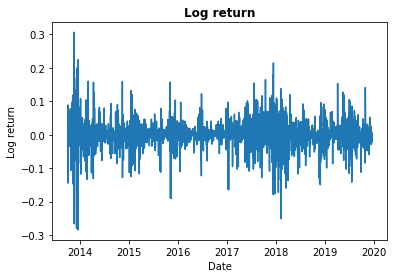

In [5]:
plt.title("Log return", weight='bold')
plt.xlabel('Date')
plt.ylabel('Log return')
plt.plot(data_date[1:], returns)
plt.show()

### Calculate squared log return

In [6]:
squared_returns = returns ** 2
print(squared_returns.describe())

count    2.256000e+03
mean     1.915180e-03
std      5.527433e-03
min      4.611903e-11
25%      3.611237e-05
50%      2.672015e-04
75%      1.415191e-03
max      9.386632e-02
dtype: float64


### Plot squared log return

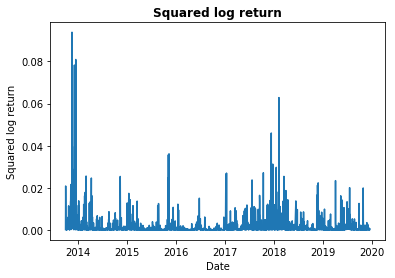

In [7]:
plt.title("Squared log return", weight='bold')
plt.xlabel('Date')
plt.ylabel('Squared log return')
plt.plot(data_date[1:], squared_returns)
plt.show()

### Calculate autocorrelation of log return

In [8]:
returns_acf = pd.DataFrame(smt.stattools.acf(returns,nlags=len(returns)))
print(returns_acf.describe())

                 0
count  2256.000000
mean      0.000222
std       0.026183
min      -0.064372
25%      -0.009374
50%      -0.000164
75%       0.008864
max       1.000000


### Plot autocorrelation of log return

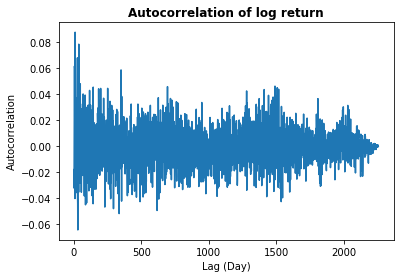

In [9]:
plt.title("Autocorrelation of log return", weight='bold')
plt.xlabel('Lag (Day)')
plt.ylabel('Autocorrelation')
plt.plot(returns_acf[1:])
plt.show()

### Calculate autocorrelation of squared log return

In [10]:
squared_returns_acf = pd.DataFrame(smt.stattools.acf(squared_returns,nlags=len(squared_returns)))
print(squared_returns_acf.describe())

                 0
count  2256.000000
mean      0.000222
std       0.033073
min      -0.038717
25%      -0.014209
50%      -0.005707
75%       0.006005
max       1.000000


### Plot autocorrelation of squared log return

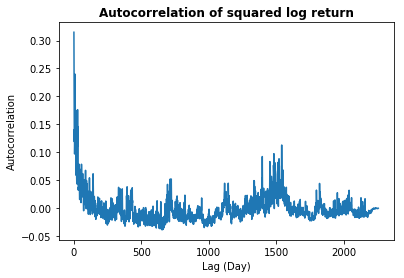

In [11]:
plt.title("Autocorrelation of squared log return", weight='bold')
plt.xlabel('Lag (Day)')
plt.ylabel('Autocorrelation')
plt.plot(squared_returns_acf[1:])
plt.show()

### GARCH model of log return

In [12]:
garch = arch_model(returns * 100)
garch_result = garch.fit()
print(garch_result.summary())
print('(alpha+beta) = ', garch_result.params['alpha[1]'] + garch_result.params['beta[1]'])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6116.482138334923
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6114.152197557943
Iteration:      3,   Func. Count:     23,   Neg. LLF: 6107.982531876907
Iteration:      4,   Func. Count:     31,   Neg. LLF: 6102.6883552280815
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6102.533990760095
Iteration:      6,   Func. Count:     47,   Neg. LLF: 6102.527514319968
Iteration:      7,   Func. Count:     53,   Neg. LLF: 6102.30451825596
Iteration:      8,   Func. Count:     59,   Neg. LLF: 6102.263977336654
Iteration:      9,   Func. Count:     65,   Neg. LLF: 6102.262259918402
Iteration:     10,   Func. Count:     71,   Neg. LLF: 6102.262104716565
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6102.262104717214
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results              

### Visualize the standardized residuals and conditional volatility

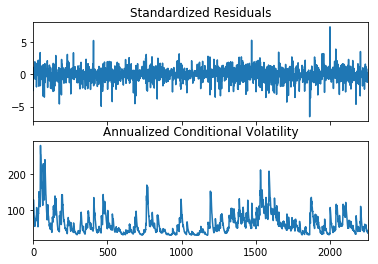

In [13]:
garch_fig = garch_result.plot(annualize='D')

### GJR-GARCH model of log return

In [14]:
gjr = arch_model(returns * 100, p=1, o=1, q=1)
gjr_result = gjr.fit(disp='off')
print(gjr_result.summary())
print('(1-alpha-beta-0.5*gamma) = ', 1 - gjr_result.params['alpha[1]'] - gjr_result.params['beta[1]'] - 0.5 * gjr_result.params['gamma[1]'])

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   None   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:               -6101.19
Distribution:                  Normal   AIC:                           12212.4
Method:            Maximum Likelihood   BIC:                           12241.0
                                        No. Observations:                 2256
Date:                Thu, Dec 19 2019   Df Residuals:                     2251
Time:                        13:32:52   Df Model:                            5
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0797  5.759e-02      1.384      0.166 [-3.31

### Calculate frequency of log return

In [15]:
# Adjust decimal point
precision = 3
returns = pd.DataFrame(np.around(returns, decimals=precision))

returns_frequency = returns.iloc[:,0].value_counts()

# Sort by the index
returns_frequency.sort_index(inplace=True)

print(returns_frequency.describe())

count    264.000000
mean       8.545455
std       11.698925
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max       55.000000
Name: 0, dtype: float64


### Plot frequency of log return

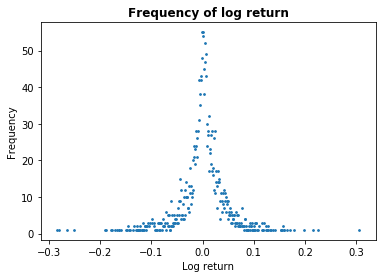

In [16]:
plt.title("Frequency of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Frequency')
plt.scatter(returns_frequency.index, returns_frequency, s=3)
plt.show()

### Calculate probability density of log return

In [17]:
returns_pdf = returns_frequency / sum(returns_frequency)
print(returns_pdf.describe())

count    264.000000
mean       0.003788
std        0.005186
min        0.000443
25%        0.000443
50%        0.001330
75%        0.004433
max        0.024379
Name: 0, dtype: float64


### Plot probability distribution of log return

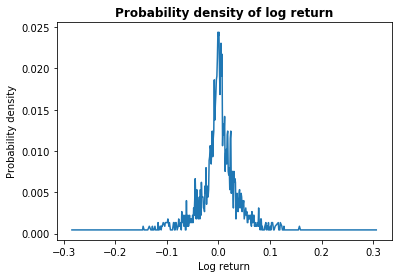

In [18]:
plt.title("Probability density of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Probability density')
plt.plot(returns_pdf.index, returns_pdf)
plt.show()

### Normalize probability density of log return

In [19]:
interval_length = 10 ** (-precision)
returns_pdf_norm = returns_pdf / sum(returns_pdf * interval_length)
print(returns_pdf_norm.describe())

count    264.000000
mean       3.787879
std        5.185694
min        0.443262
25%        0.443262
50%        1.329787
75%        4.432624
max       24.379433
Name: 0, dtype: float64


### Plot probability density normalization of log return

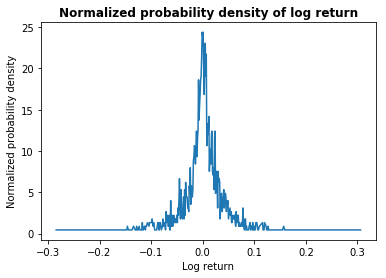

In [20]:
plt.title("Normalized probability density of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Normalized probability density')
plt.plot(returns_pdf_norm.index, returns_pdf_norm)
plt.show()
